In [2]:
%matplotlib inline
import numpy
import matplotlib.pylab as plt
import scipy
from scipy import integrate

In [3]:
# do everything in SI units
# set up helper functions first


In [4]:
def QPNe(r, Nm,Hm,Ym):
    # Nm in m^{-3}, Hm in km, Ym in km
    # croft and hoogasian ionosphere - good for checking
    # https://doi.org/10.1002/rds19683169
    HmMeters = Hm*1000.
    YmMeters = Ym*1000.
    Rearth = 6371.*1000. #m
    rMax = (HmMeters+Rearth)
    rBase = rMax - YmMeters
    rTop = rMax + YmMeters
    
    if (r > rBase) and (r < rTop):
        a = (r-rMax)/(YmMeters)
        Ne = Nm*(1.-(a*a))
        dNedr = -2.*Nm*a/YmMeters
    else:
        Ne = 1.e-31
        dNedr = 1.e-31
    return Ne, dNedr

In [5]:
# set some of these things in a class or at initialization
def IndexRefractionNoB(r,frequency, IonoParams):
    # frequency in Hz
    #mu squared
#     print(IonoParams)
    if IonoParams[0] == 'QP':
        Nm = float(IonoParams[1])
        Hm = float(IonoParams[2])
        Ym = float(IonoParams[3])
        Ne,dNedr = QPNe(r,Nm,Hm,Ym)
    fePlasma = 8.98e3*numpy.sqrt(Ne/1.e6)
    X = fePlasma/frequency # to be consistent with appleton hartree equation
    mu2 = 1.-X*X
    dXdr = X*dNedr/(2.*Ne)
    dmu2dr = -2.*X*dXdr
    
    return mu2,dmu2dr
    

In [13]:
Nm = 5.e11
Ym = 50.
Hm = 300.
frequency = 5.e6

rTest = numpy.arange(6371.,6700.,1.)*1000.
#print(rTest)

for ii in rTest:
    Ne,dNedr = QPNe(ii, Nm,Hm,Ym)
    if Ne == 1e-31:
        Ne = "Default"
    if dNedr == 1e-31:
        dNedr = "Default"
    #print(ii, Ne, dNedr)

IonoParams = numpy.array(['QP',Nm,Hm,Ym])

for ir in rTest: 
    mu2,dmu2dr = IndexRefractionNoB(ir,frequency, IonoParams)
    if mu2 == 1.0:
        mu2 = "Default"
    print(ir, mu2,dmu2dr)


6371000.0 Default -3.2256160000000006e-43
6372000.0 Default -3.2256160000000006e-43
6373000.0 Default -3.2256160000000006e-43
6374000.0 Default -3.2256160000000006e-43
6375000.0 Default -3.2256160000000006e-43
6376000.0 Default -3.2256160000000006e-43
6377000.0 Default -3.2256160000000006e-43
6378000.0 Default -3.2256160000000006e-43
6379000.0 Default -3.2256160000000006e-43
6380000.0 Default -3.2256160000000006e-43
6381000.0 Default -3.2256160000000006e-43
6382000.0 Default -3.2256160000000006e-43
6383000.0 Default -3.2256160000000006e-43
6384000.0 Default -3.2256160000000006e-43
6385000.0 Default -3.2256160000000006e-43
6386000.0 Default -3.2256160000000006e-43
6387000.0 Default -3.2256160000000006e-43
6388000.0 Default -3.2256160000000006e-43
6389000.0 Default -3.2256160000000006e-43
6390000.0 Default -3.2256160000000006e-43
6391000.0 Default -3.2256160000000006e-43
6392000.0 Default -3.2256160000000006e-43
6393000.0 Default -3.2256160000000006e-43
6394000.0 Default -3.2256160000000

In [6]:
def Lagrangian(t, x, args):
#     print(x)
    r = x[0]
    theta = x[1]
    Q = x[2]
    frequency = args[0]
    IonoParams = args[1]
    y = numpy.zeros(3)
    # call index of refraction
    mu2 = 
    
    # P1 is the group delay
    dQdP1 = dmu2dr/2. + (mu2-Q*Q)/r # equation 10
    drdP1 = Q
    dthetadP1 = numpy.sqrt(mu2-Q*Q)/r
#     print(y)
    y[0] = drdP1
    y[1] = dthetadP1
    y[2] = dQdP1
    return y

In [7]:
frequency = 8.e6
Nm = 5.e11
Ym = 50.
Hm = 300.
r = 6371.e3
IonoParams = numpy.array(['QP',Nm,Hm,Ym])
IndexRefractionNoB(r,frequency, IonoParams)

(1.0, -1.2600062500000002e-43)

In [8]:
# set initial conditions
Elevation = 45.
Qinitial = numpy.sin(numpy.deg2rad(Elevation))
rInitial = 6371.e3
thetaInitial = 0.
x0 = numpy.array([rInitial,thetaInitial,Qinitial])

print 

# set parameters
frequency = 8.e6
Nm = 5.e11
Ym = 50.
Hm = 300.
IonoParams = numpy.array(['QP',Nm,Hm,Ym])

print(Lagrangian(0.,x0, (frequency, IonoParams)))
# set initial vector

t0 = 0.
# initalize ode integration with adapative step size
# little help from other program...
# need to help each time
rdopri = scipy.integrate.ode(Lagrangian).set_integrator('dopri5',\
                    atol=1e-6, first_step=10e3,max_step=10e3,dfactor=0.1,nsteps=1,)
rdopri.set_f_params((frequency,IonoParams))
rdopri.set_initial_value(x0,t0)

[7.07106781e-01 1.10988351e-07 7.84806153e-08]


In [9]:
x = numpy.zeros([3,1000])*numpy.nan
t1 = numpy.zeros(1000)*numpy.nan
k = 0
tIntLimit = 8000.*1e3
t = t0
k=0
while t < tIntLimit:
    tx = rdopri.integrate(tIntLimit,step=True)
    print(tx)
    t = rdopri.t
    print(t)
    t1[k] = rdopri.t
    x[:,k] = tx
    k+=1
    if tx[0] < 6371e3:
        break
    if tx[0] > 6871e3:
        break
    if k > 998:
        break

[6.38515780e+06 2.21484694e-03 7.08671179e-01]
20000.0
[6.39934678e+06 4.41988289e-03 7.10225193e-01]
40000.0
[6.41356674e+06 6.61515161e-03 7.11768894e-01]
60000.0
[6.42781747e+06 8.80069682e-03 7.13302350e-01]
80000.0
[6.44209876e+06 1.09765622e-02 7.14825630e-01]
100000.0
[6.45641042e+06 1.31427916e-02 7.16338801e-01]
120000.0
[6.47075225e+06 1.52994285e-02 7.17841933e-01]
140000.0
[6.48512403e+06 1.74465167e-02 7.19335093e-01]
160000.0
[6.49952558e+06 1.95840997e-02 7.20818349e-01]
180000.0
[6.51395670e+06 2.17122211e-02 7.22291768e-01]
200000.0
[6.52841719e+06 2.38309245e-02 7.23755417e-01]
220000.0
[6.54290685e+06 2.59402533e-02 7.25209362e-01]
240000.0
[6.5574255e+06 2.8040251e-02 7.2665367e-01]
260000.0
[6.57197294e+06 3.01309610e-02 7.28088406e-01]
280000.0
[6.58654897e+06 3.22124265e-02 7.29513638e-01]
300000.0
[6.60115342e+06 3.42846909e-02 7.30929429e-01]
320000.0
[6.61578609e+06 3.63477973e-02 7.32335846e-01]
340000.0
[6.61865782e+06 3.67511572e-02 7.32610452e-01]
343920.5

C:\Users\Andrew\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))
C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app



346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.620

[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.69989619e-02 7.32779097e-01]
346330.8991062436
[6.62042384e+06 3.6998961

In [10]:
dist = x[1,:]*6371e3
height = x[0,:] - 6371e3

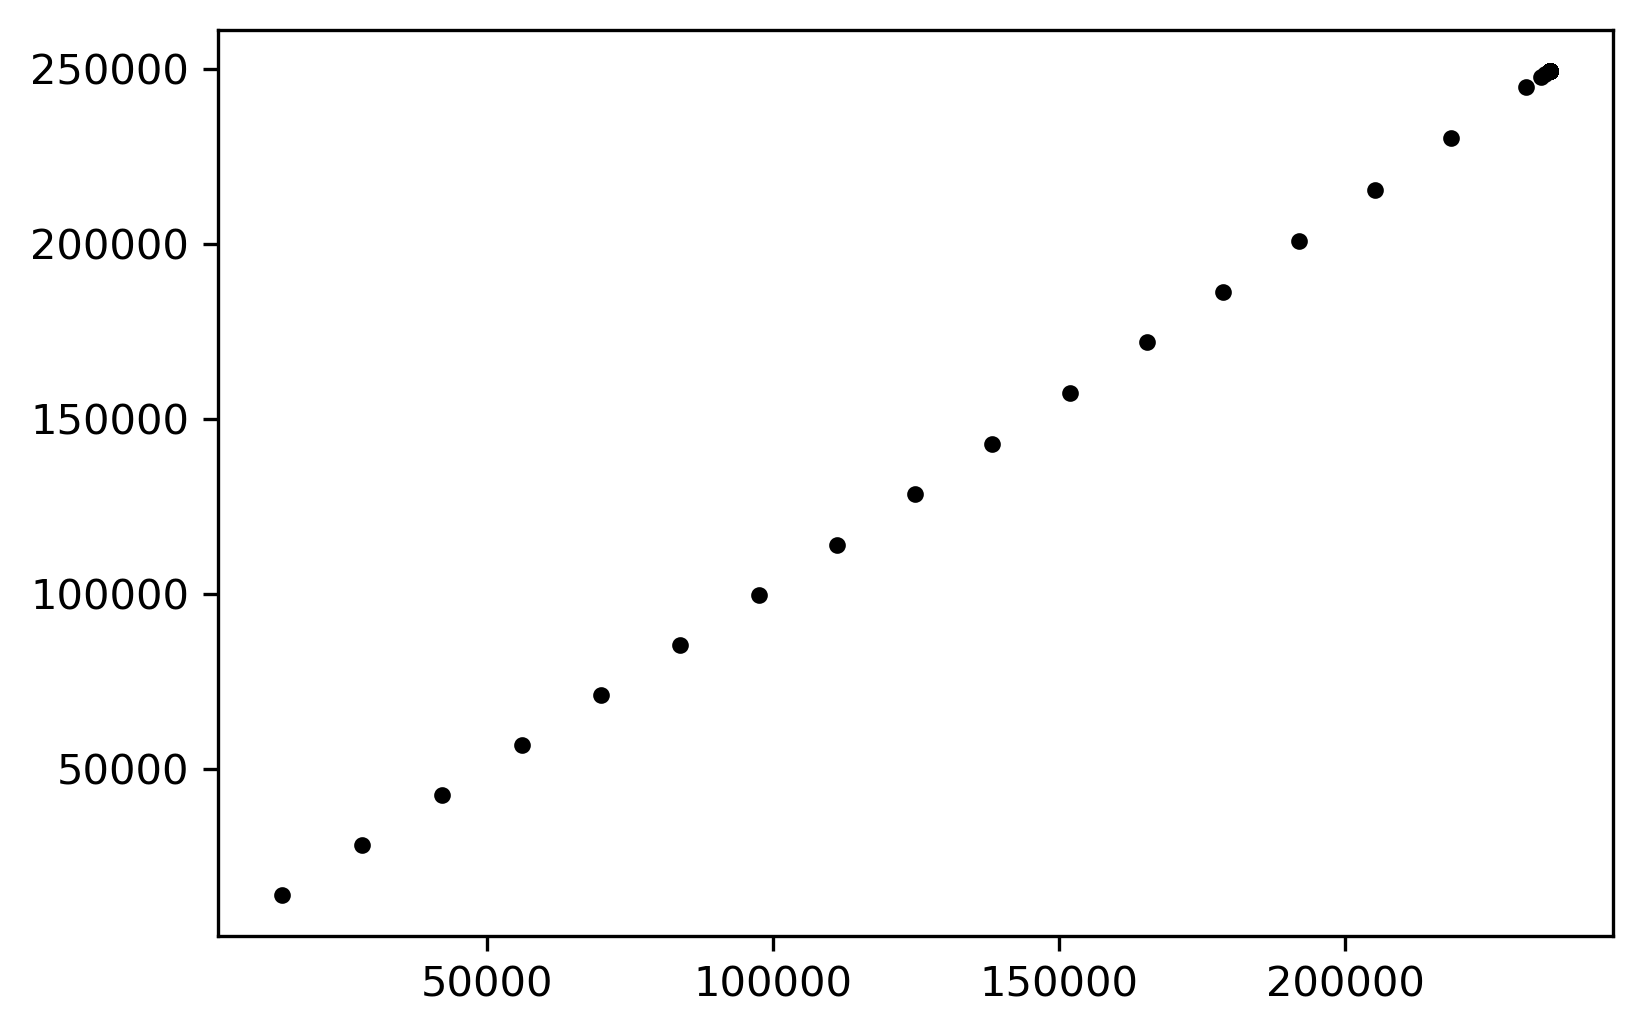

In [11]:
plt.figure(dpi=300)
plt.plot(dist,height, 'k.')